In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 20, 'linewidths':3}

In [ ]:
!pip install hdbscan
import hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 32.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039282 sha256=f06ac0d73acb0645698a1b0aefa56e17830ad6c9a39ef0f8b5fdacc9fdfca303
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.7
    Uninstalling Cython-3.0.7:
      Successfully uninstalled Cython-3.0.7


In [ ]:
data = np.load('/content/data.npy')

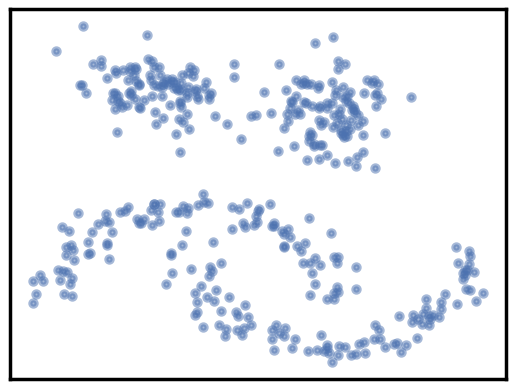

In [ ]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [ ]:
#This is the clustering and clusters plotting function
def plot_clusters(data, algorithm, args, kwds):
  start_time = time.time()
  labels = algorithm(*args, **kwds).fit_predict(data)
  end_time = time.time()
  palette = sns.color_palette('deep', np.unique(labels).max() + 1)
  colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
  plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
  plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
  plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time),
fontsize=14)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


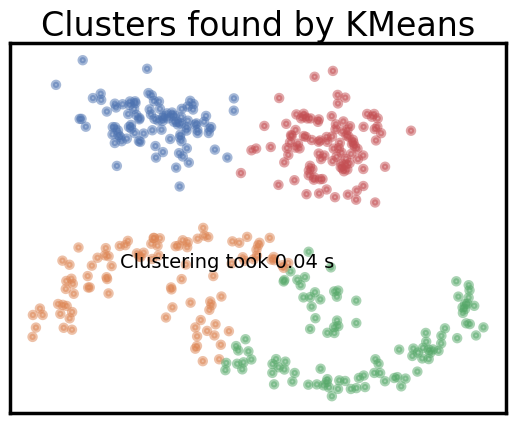

In [ ]:
#K means elkan clustering algorithm
plot_clusters(data, cluster.KMeans, (), {'n_clusters': 4, 'init': 'random', 'algorithm': 'elkan', 'max_iter':500})

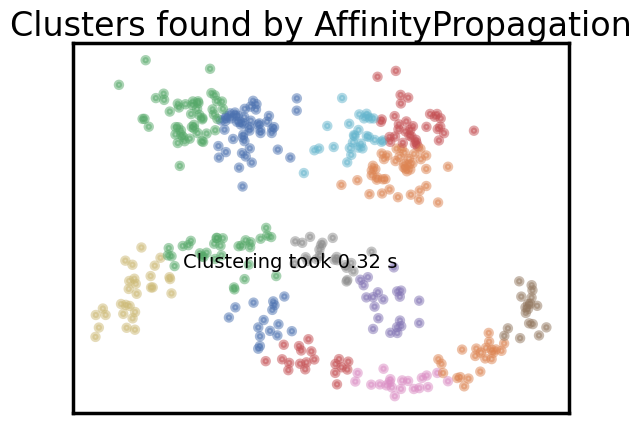

In [ ]:
#Affinity Propagation algorithm
damping_factor = 0.9
plot_clusters(data, cluster.AffinityPropagation, (), {'damping': damping_factor})

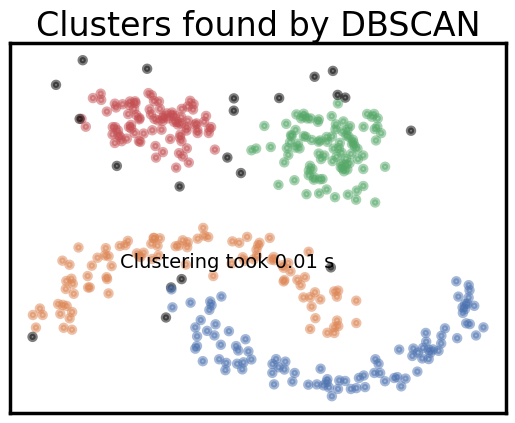

In [ ]:
#DBSCAN clustering algorithm
plot_clusters(data, cluster.DBSCAN, (), {'min_samples': 6, 'eps' : 0.2})

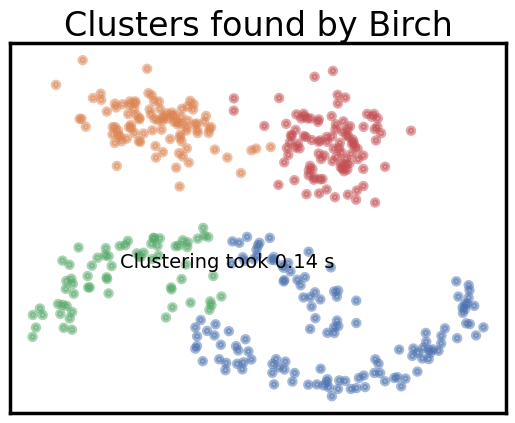

In [ ]:
#BIRCH clustering algorithm
plot_clusters(data, cluster.Birch, (), {'n_clusters':4, 'branching_factor':50, 'threshold':0.1})

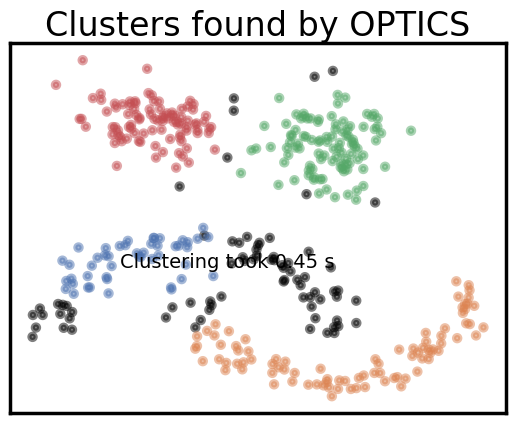

In [ ]:
#OPTICS clustering algorithm
plot_clusters(data, cluster.OPTICS, (), {'xi':0.05, 'min_samples': 25})

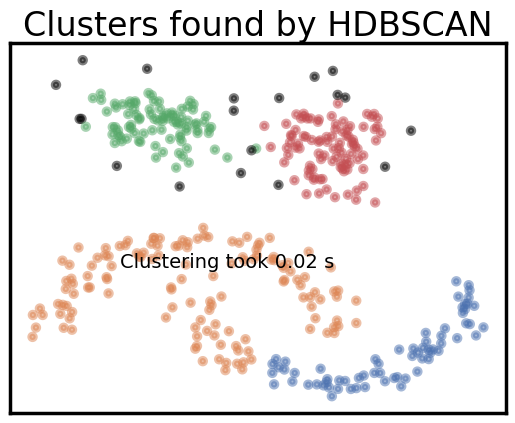

In [ ]:
#HBSCAN clustering algorithm
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':4})

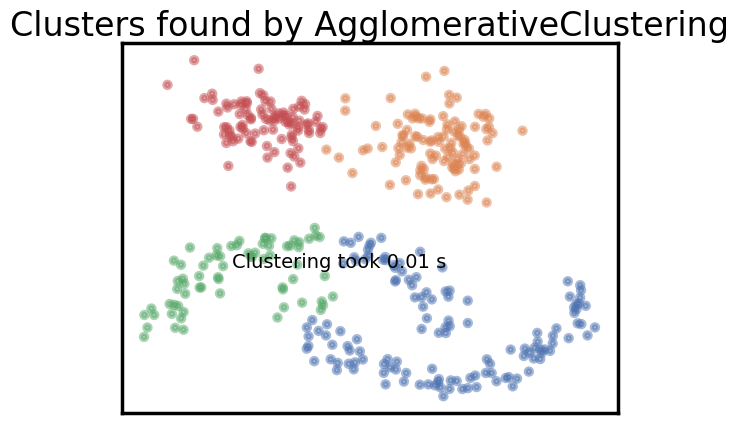

In [ ]:
#Agglomerative clustering algorithm
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':4, 'linkage':'ward'})

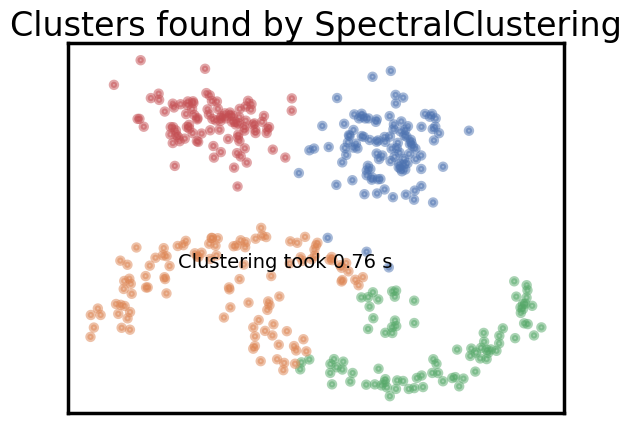

In [ ]:
#Spectral clustering algorithm
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':4, 'affinity':'rbf'})